In [22]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../codes/')
from myUtils import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def setFont(ax, font, size):
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font)
        label.set_fontsize(size)
    return ax

In [11]:
################################### cities ###################################################
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
#################################### res #######################################################
dff = pd.read_csv("../data_revision/results/allCities1.csv")

In [12]:
dff.head()

,city,ep0,ep0F,ep1F,deltaExposure0,deltaExposure1,deltaNDVIGlobal0,deltaNDVIGlobal1,deltaNDVILocal,di
0,Guangzhou,2.439409e+08,2.225792e+08,2.217250e+08,-8.756942,-9.107077,22.418835,6.751969,0.14,0.1
1,Los Angeles,1.853492e+08,1.772971e+08,1.769756e+08,-4.344263,-4.517703,29.859159,9.307023,0.14,0.1
2,New York,1.852970e+08,1.761012e+08,1.753815e+08,-4.962745,-5.351144,10.133234,4.614223,0.14,0.1
3,Tokyo,4.417161e+08,4.224693e+08,4.216518e+08,-4.357271,-4.542335,16.227620,6.140417,0.14,0.1
4,Jakarta,1.673355e+08,1.471922e+08,1.462661e+08,-12.037642,-12.591094,14.740712,4.986738,0.14,0.1


In [13]:
dfcc = dfc[['UC_NM_MN','climate']]
dfcc.columns = ['city', 'climate']
dfcc=pd.merge(dff,dfcc,on='city')
dfcc=dfcc[['deltaExposure0','di','climate','deltaNDVILocal']]
dfcc.columns=['deltaExposure0','NDVI','climate', 'deltaNDVILocal']
dfcc['savings']=100*(dff['deltaNDVIGlobal1']-dff['deltaNDVIGlobal0'])/dff['deltaNDVIGlobal0']
dfcc['deltaLocal']=dff['deltaNDVILocal']-dff['di']

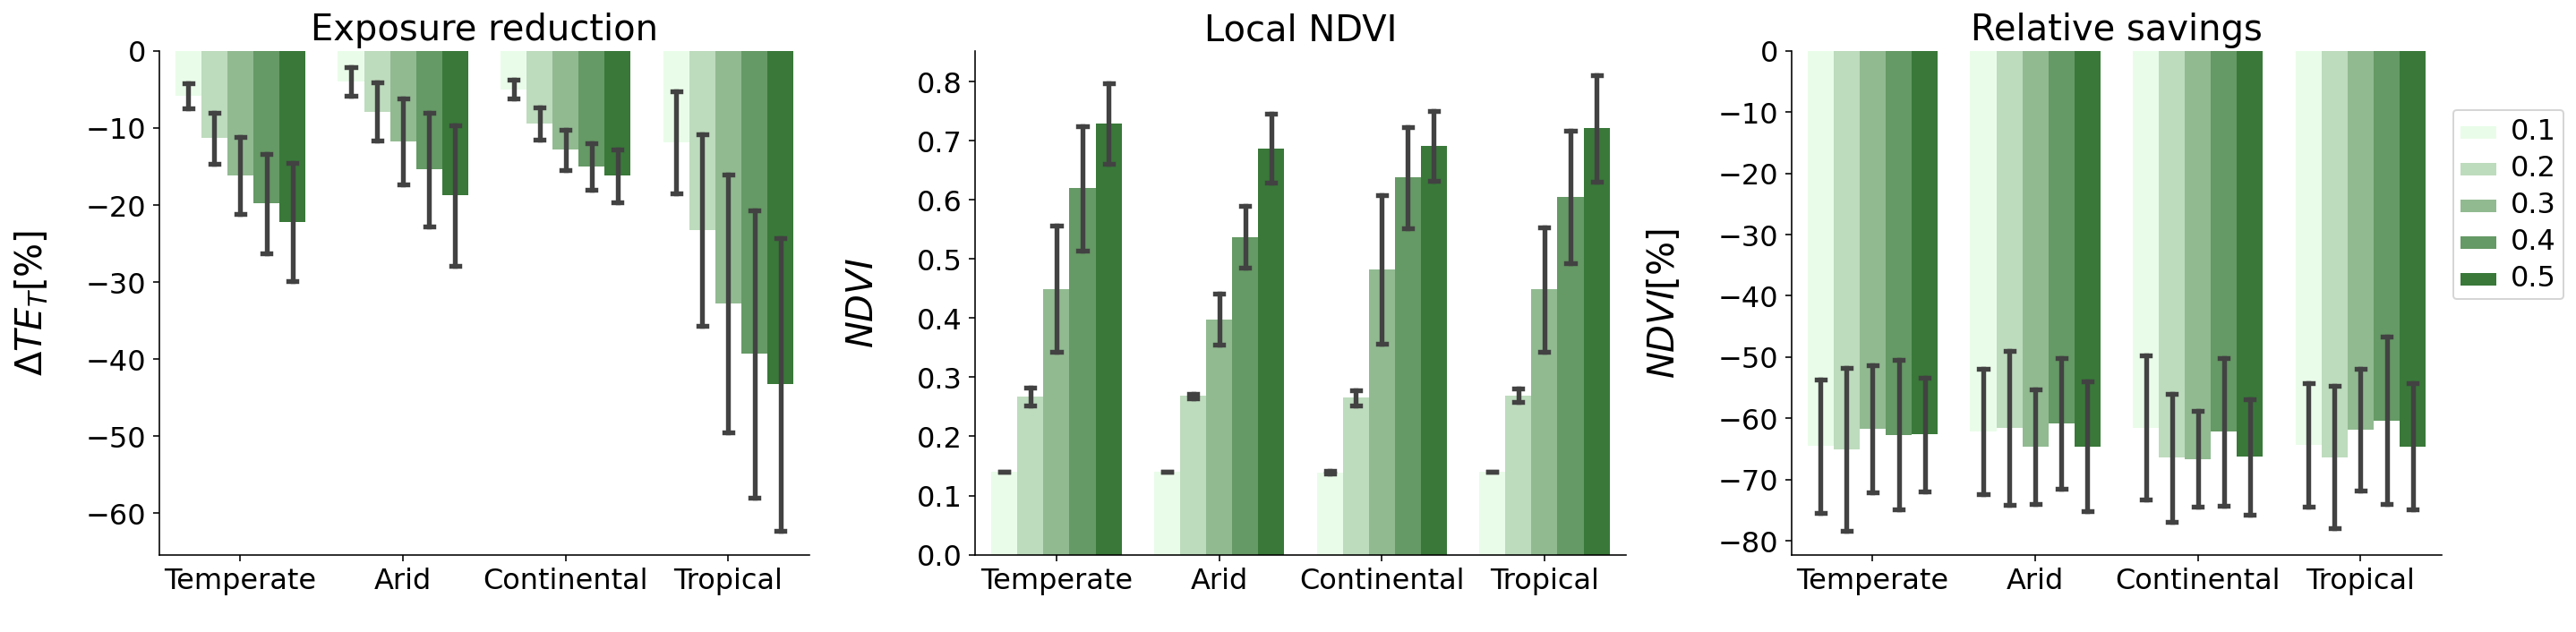

In [15]:
palette = sns.light_palette("darkgreen") 
#palette = sns.diverging_palette(100, 160, s=70)
f,axs=plt.subplots(1,3, figsize=(20,5))
ax=axs[0]
ax = setFont(ax,'Arial',16)
sns.barplot(x="climate", y="deltaExposure0", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$\Delta TE_T[\%]$', size=20,  labelpad=20)
ax.set_title('Exposure reduction', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend().set_visible(False)
#plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax=axs[1]
ax = setFont(ax,'Arial',16)
sns.barplot(x="climate", y="deltaNDVILocal", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$NDVI$', size=20,  labelpad=20)
ax.set_title('Local NDVI', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend().set_visible(False)
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax=axs[2]
ax = setFont(ax,'Arial',16)
sns.barplot(x="climate", y="savings", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$NDVI [\%]$', size=20,  labelpad=20)
ax.set_title('Relative savings', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend(bbox_to_anchor=(1.2, .9))
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title
f.tight_layout()


[None, None]

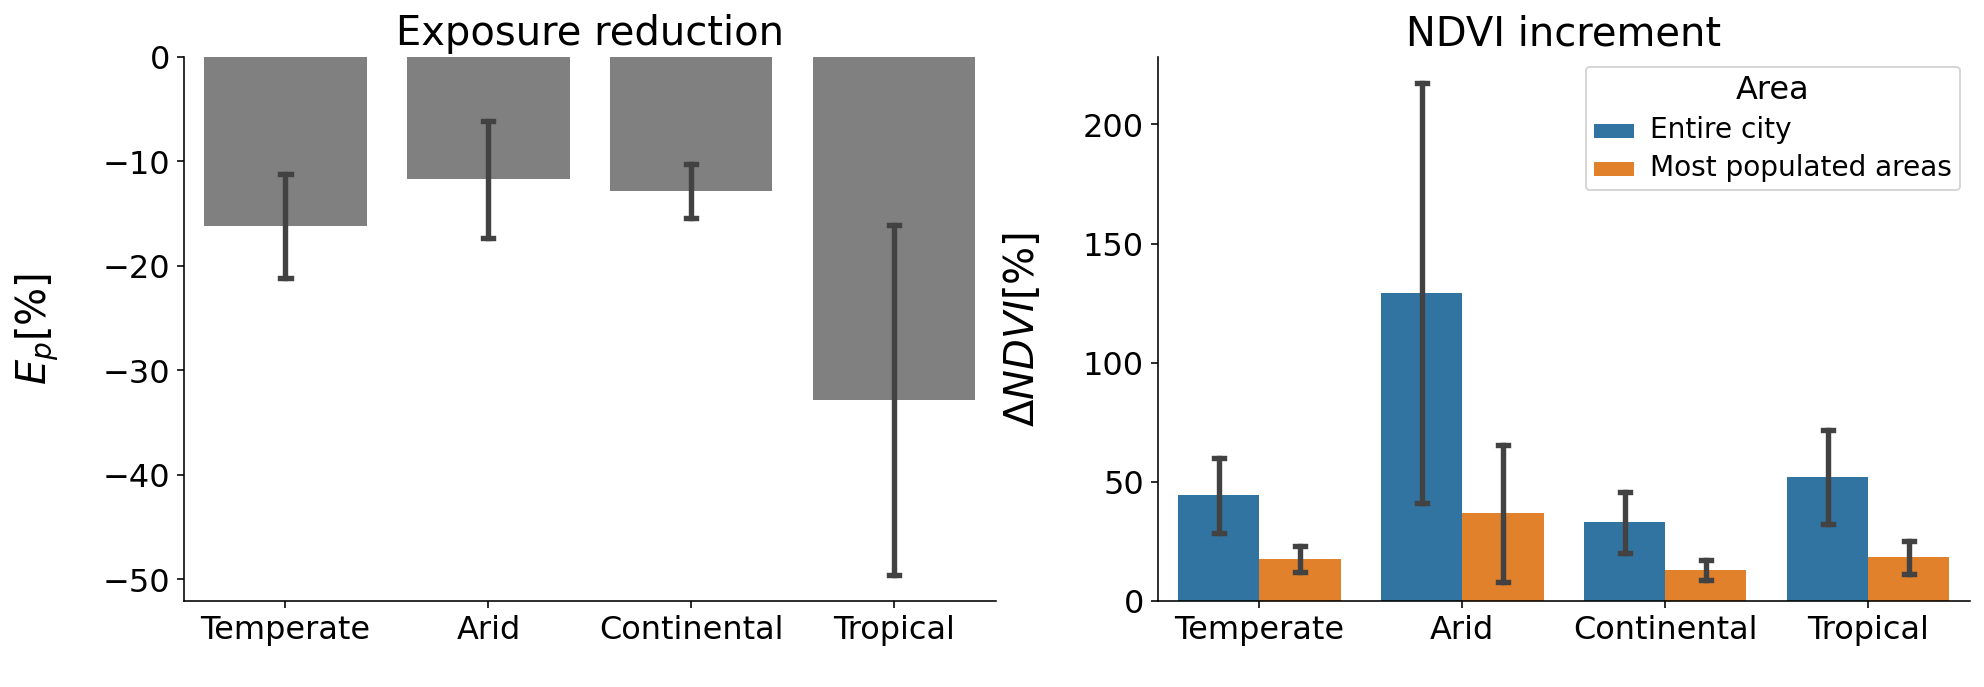

In [16]:
dff1 = dff[dff['di']==0.3].reset_index(drop=True)
dff1['climate']=dfc['climate']
dff0 = dff1[['climate', 'deltaNDVIGlobal0', 'deltaNDVIGlobal1', 'di', 'deltaExposure0', 'deltaNDVILocal']]
dff1 = dff1[['climate', 'deltaNDVIGlobal0', 'deltaNDVIGlobal1']]
dff1 = dff1.melt(id_vars=['climate'])
dff1['variable'] = dff1['variable'].str.replace('deltaNDVIGlobal0', 'Entire city')
dff1['variable'] = dff1['variable'].str.replace('deltaNDVIGlobal1', 'Most populated areas')
dff1.columns = ['climate', 'Area', 'value']


f,axs=plt.subplots(1,2, figsize=(16,5))
palette = ['gray']
ax=axs[0]
ax = setFont(ax,'Arial',16)
sns.barplot(x="climate", y="deltaExposure0", data=dff0, palette=palette, ax=ax, 
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$E_p[\%]$', size=20,  labelpad=20)
ax.set_title('Exposure reduction', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

ax=axs[1]
ax = setFont(ax,'Arial',16)
g=sns.barplot(x="climate", y="value", hue='Area', data=dff1, ax=ax, ci = 'sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$\Delta NDVI[\%]$', size=20,  labelpad=20)
ax.set_title('NDVI increment', size=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title


In [64]:
dff0.groupby('climate')['deltaExposure0'].mean()

climate
Arid          -11.720137
Continental   -12.839476
Temperate     -16.165524
Tropical      -32.821031
Name: deltaExposure0, dtype: float64

In [66]:
dff0['NDVIdiff']=dff0['deltaNDVIGlobal0']-dff0['deltaNDVIGlobal1']
dff0.groupby('climate')['NDVIdiff'].mean()

climate
Arid           92.510607
Continental    20.105509
Temperate      26.764316
Tropical       33.714624
Name: NDVIdiff, dtype: float64

In [17]:
################################### Entire figure #####################################################
### Koppen
kg = gpd.read_file('../data_revision/climate/kg.shp')
kg = kg.to_crs('+proj=wintri') 
cmap = mpl.colors.ListedColormap(['gold','navy','slategrey','yellowgreen','maroon'])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('+proj=wintri') 


In [18]:
dfc = dfc.to_crs('+proj=wintri') 
DFC = pd.DataFrame()
DFC['X']=dfc['geometry'].centroid.x
DFC['Y']=dfc['geometry'].centroid.y
DFC['expDN'] = -dff0['deltaExposure0']
DFC['climate'] = dfc['climate']

[None, None]

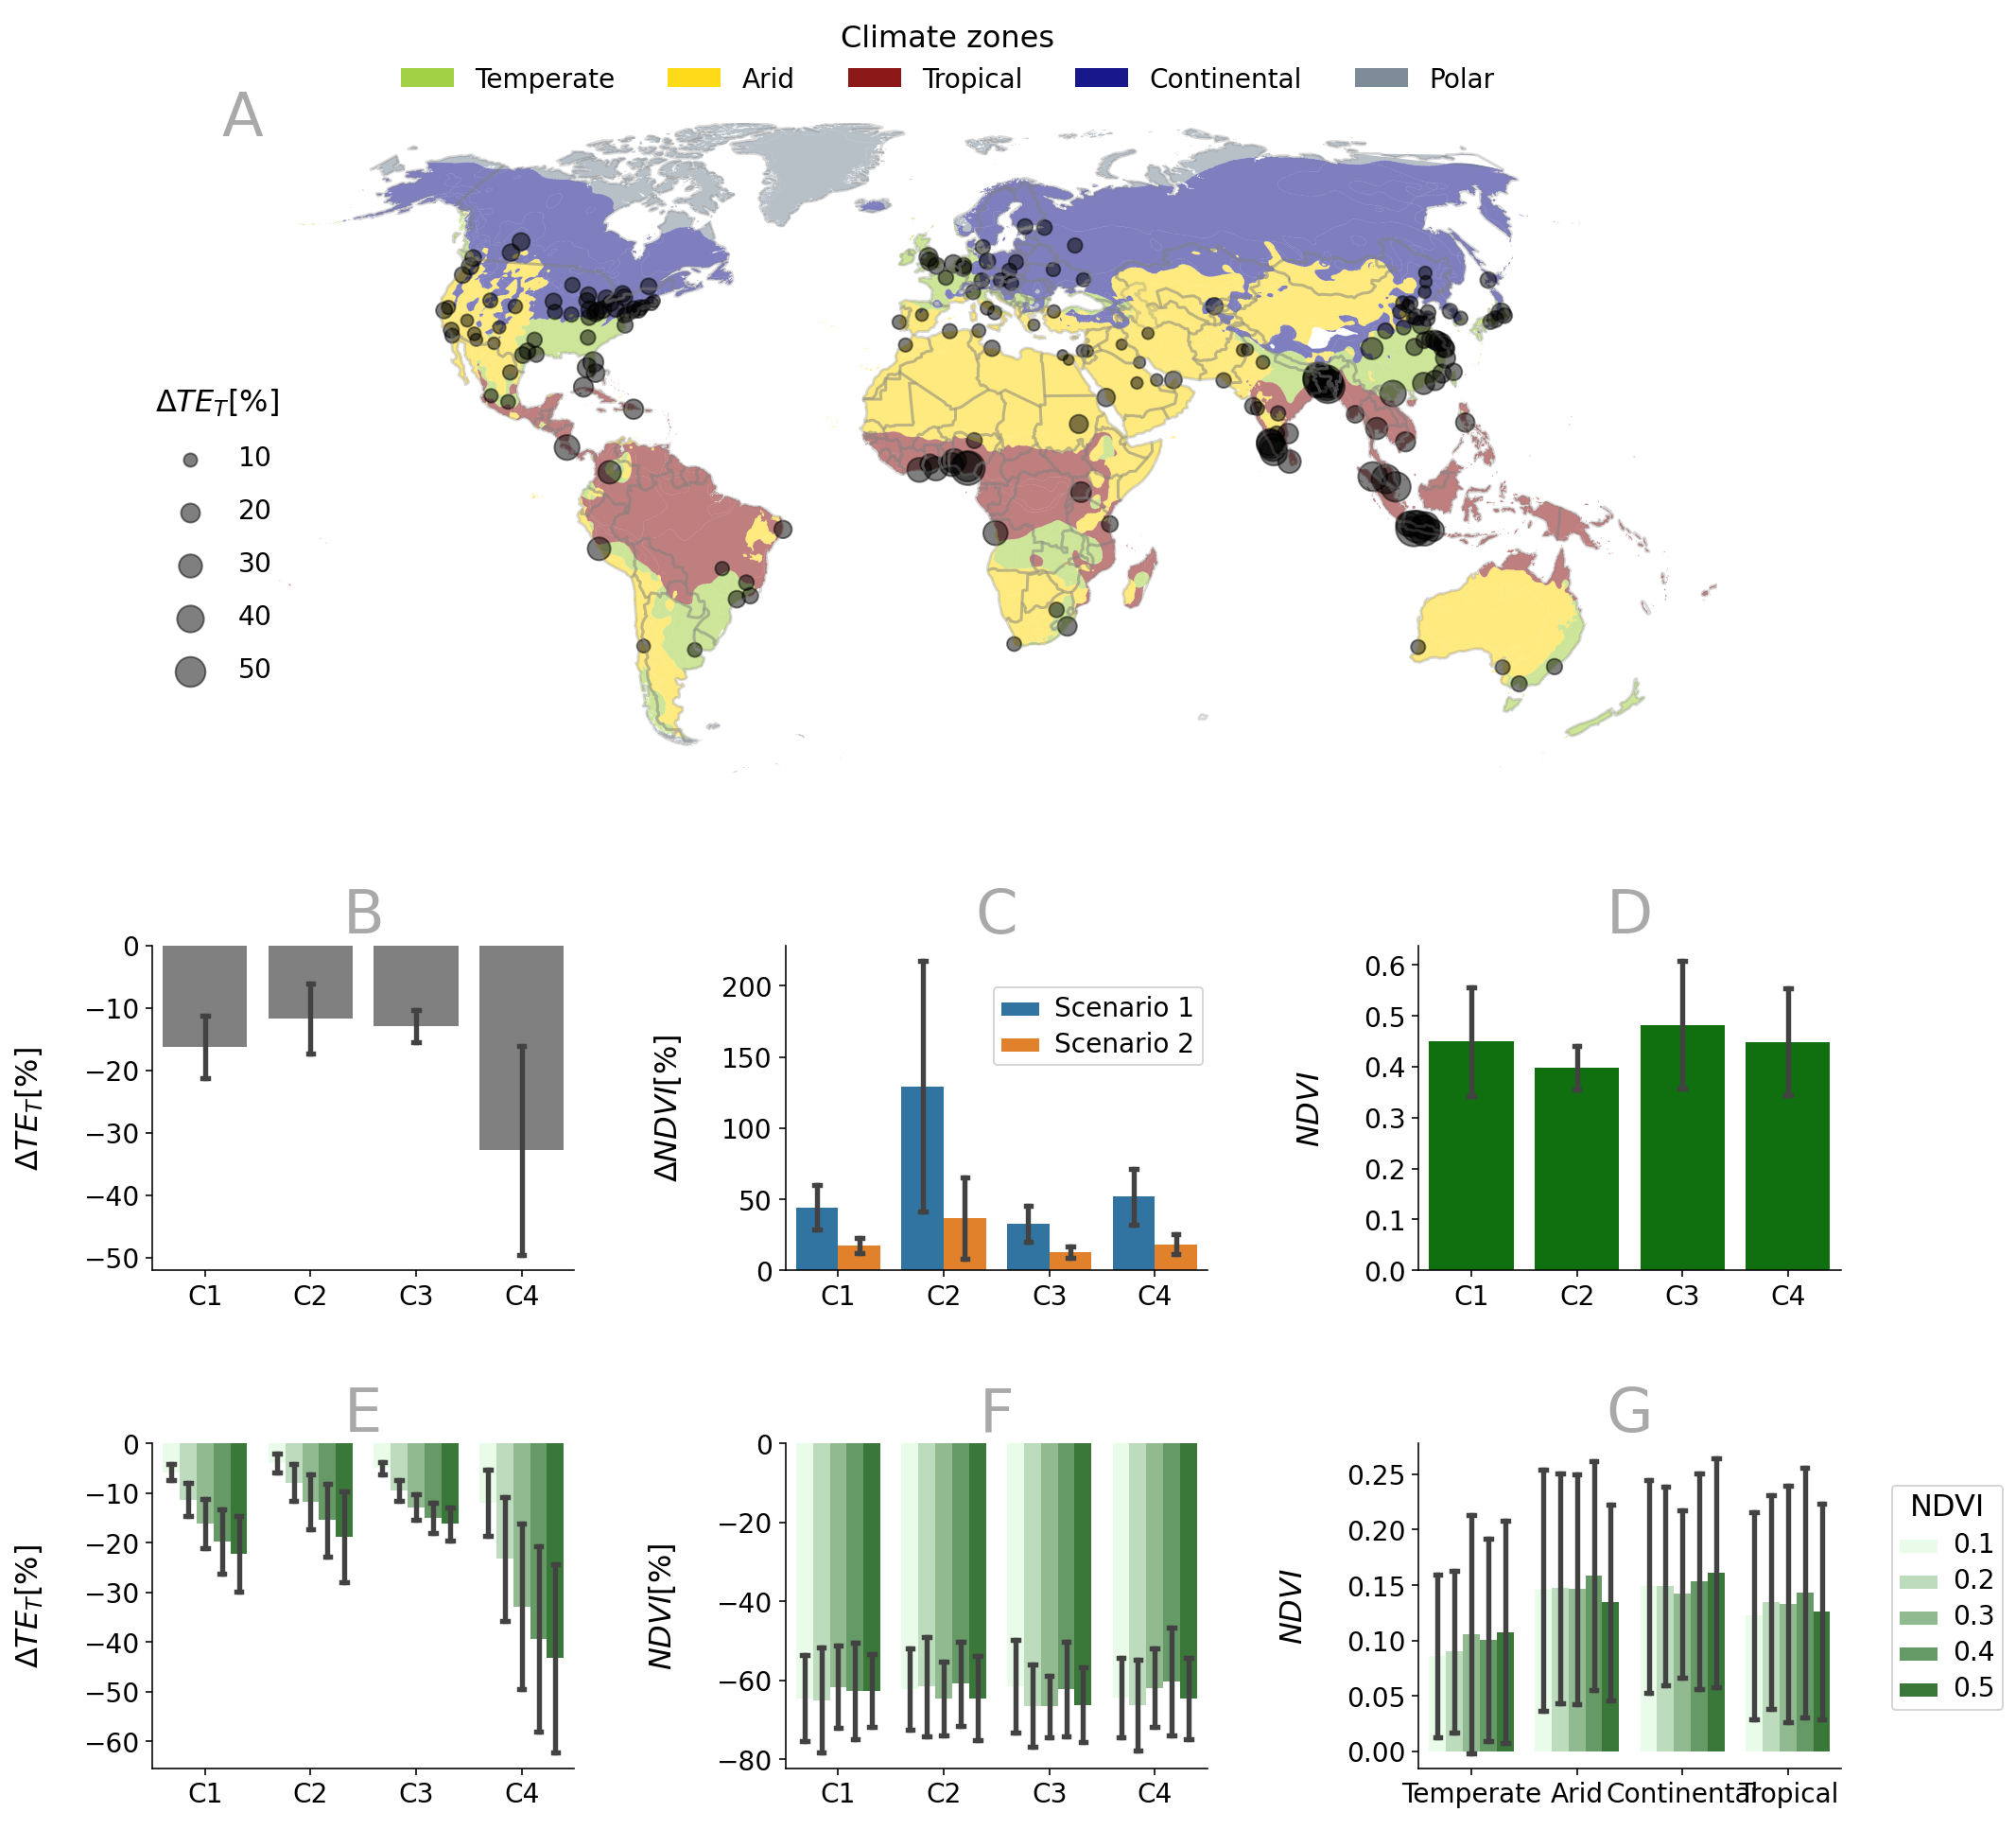

In [62]:
divnorm=colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=1)
fs = 16
fs1 = 14
f = plt.figure(figsize=(16,16))

gs = gridspec.GridSpec(3, 3,height_ratios=[2,1,1], wspace=0.5, hspace=0.4)
ax = plt.subplot(gs[0, :])
kg.plot(column='climate',ax=ax,cmap=cmap,markersize=1,legend=True,alpha=0.5, 
       legend_kwds={'fontsize':fs1, 'frameon':False, 'loc':3})

plt.scatter(DFC['X'], DFC['Y'], s=DFC['expDN']*5, color='black', alpha=0.5)
ax.axis('off')

### Fake plot
lst = [10*5, 20*5, 30*5, 40*5, 50*5]
labels = [r'$10$',r'$20$',  r'$30$',  r'$40$',  r'$50$']
for i, s in enumerate(lst):
    ax.scatter([-10*10500000],[-10*10500000], c='black' , s=s, alpha=0.5, label=labels[i])
    
legend1 = ax.legend(scatterpoints=1, frameon=False,
        labelspacing=1, loc='lower left', fontsize= fs1,
        bbox_to_anchor=(-.1,.1),
        title=r'$\Delta TE_T [\%]$',
        title_fontsize=fs)
f.gca().add_artist(legend1)

### Add second legend
list_of_climates =  ['Temperate', 'Arid', 'Tropical', 'Continental', 'Polar']

color_dict = {'Temperate':'yellowgreen',
              'Arid':'gold',
              'Tropical':'maroon',
              'Continental':'navy', 
              'Polar':'slategrey'}

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]
for ion in list_of_climates:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=0, 
                                    edgecolor='black'))
world.boundary.plot(ax=ax, color='gray', alpha=0.3)
# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=fs1, loc='lower left',frameon=False,
        bbox_to_anchor = (0.07,1.01), title_fontsize=fs, title='Climate zones', ncol=5)


cb_ax = f.axes[-1]
cb_ax.tick_params(labelsize=fs1)
ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);

ax.text(-1.8*10000000, 0.9*10000000, 'A', fontsize=fs*2, color='darkgray');

###################################### B ######################################################################
palette1 = ['gray']
ax2 = plt.subplot(gs[1,0])
ax2 = setFont(ax2,'Arial',fs1)
sns.barplot(x="climate", y="deltaExposure0", data=dff0, palette=palette1, ax=ax2, 
            ci ='sd', capsize = 0.05)
ax2.set_xlabel(' ')
ax2.set_ylabel(r'$\Delta TE_T [\%]$', size=fs,  labelpad=20)
#ax2.set_title('Exposure reduction', size=20)
ax2.set_title('B', fontsize=fs*2, color='darkgray')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False);
ax2.set_xticklabels(['C1', 'C2', 'C3', 'C4']);


###################################### C ######################################################################
dff00 = dff0[['climate', 'deltaNDVIGlobal0', 'deltaNDVIGlobal1']]
dff00=dff00.melt(id_vars=['climate'])
dff00['variable'] = dff00['variable'].str.replace('deltaNDVIGlobal0', 'Scenario 1')
dff00['variable'] = dff00['variable'].str.replace('deltaNDVIGlobal1', 'Scenario 2')
dff00.columns = ['climate', 'Scenario', 'value']

ax = plt.subplot(gs[1,1])
ax = setFont(ax,'Arial',fs1)
g=sns.barplot(x="climate", y="value", hue='Scenario', data=dff00, ax=ax, ci = 'sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$\Delta NDVI[\%]$', size=fs,  labelpad=20)
#ax.set_title('NDVI increment', size=20)
ax.set_title('C', fontsize=fs*2, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], bbox_to_anchor=(1.01,.9))
plt.setp(ax.get_legend().get_texts(), fontsize=fs1); # for legend text;
ax.set_xticklabels(['C1', 'C2', 'C3', 'C4']);


###################################### D ######################################################################

ax = plt.subplot(gs[1,2])
ax = setFont(ax,'Arial',fs1)
palette = ['green']
sns.barplot(x="climate", y="deltaNDVILocal", data=dff0, palette=palette, ax=ax, ci = 'sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$NDVI$', size=fs,  labelpad=20)
#ax.set_title('Local NDVI', size=20)
ax.set_title('D', fontsize=fs*2, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.set_xticklabels(['C1', 'C2', 'C3', 'C4']);



############################################ E ###############################################
palette = sns.light_palette("darkgreen") 
ax = plt.subplot(gs[2,0])
ax = setFont(ax,'Arial',fs1)
sns.barplot(x="climate", y="deltaExposure0", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$\Delta TE_T[\%]$', size=fs,  labelpad=20)
#ax.set_title('Exposure reduction', size=20)
ax.set_title('E', fontsize=fs*2, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend().set_visible(False)
ax.set_xticklabels(['C1', 'C2', 'C3', 'C4']);


############################################ F ###############################################
ax = plt.subplot(gs[2,1])
ax = setFont(ax,'Arial',fs1)
sns.barplot(x="climate", y="savings", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$NDVI [\%]$', size=fs,  labelpad=20)
#ax.set_title('Relative savings', size=20)
ax.set_title('F', fontsize=fs*2, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend().set_visible(False)
ax.set_xticklabels(['C1', 'C2', 'C3', 'C4']);


############################################ G ###############################################
ax = plt.subplot(gs[2,2])
ax = setFont(ax,'Arial',fs1)
sns.barplot(x="climate", y="deltaLocal", hue='NDVI', data=dfcc, ax=ax, palette=palette,
            ci ='sd', capsize = 0.05)
ax.set_xlabel(' ')
ax.set_ylabel(r'$NDVI$', size=fs,  labelpad=20)
#ax.set_title('Local NDVI', size=20)
ax.set_title('G', fontsize=fs*2, color='darkgray')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
ax.legend().set_visible(False)
#ax.set_xticklabels(['C1', 'C2', 'C3', 'C4']);
ax.legend(bbox_to_anchor=(1.1, .9), title='NDVI')
plt.setp(ax.get_legend().get_texts(), fontsize=fs1) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=fs) # for legend title


In [61]:
f.savefig('../figures_revision/Figure5.pdf', bbox_inches = 'tight')